### Classification Analysis

A. Implementation of Support Vector Machines (SVM) for classifying images of hand-written digits into their respective numerical classes (0 to 9).

###Step 1: Import Required Libraries

In [ ]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt


Why?

These libraries are essential for:

Loading the dataset (digits from sklearn).

Splitting the dataset into training and testing sets (train_test_split).

Scaling features to standardize the data (StandardScaler).

Training SVM models with different kernels (SVC).

Evaluating model performance (accuracy and classification report).

Visualizing some predictions (matplotlib).

### Step 2: Load the Dataset

In [ ]:
digits = datasets.load_digits()
X, y = digits.data, digits.target


Why?

The digits dataset is a common dataset for image classification, where each image represents a handwritten digit (0-9).

 It’s already labeled and pre-processed, so it’s ideal for testing and comparing classification models without needing additional preprocessing.

X contains flattened images as feature vectors (8x8 pixels, so 64 features).
y contains the labels (0 to 9) for each image.

### Step 3: Preprocess the Data

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Why?

Standardization is critical for SVMs because they are sensitive to feature scaling. Standardizing (mean of 0, variance of 1) ensures that each feature contributes equally to the distance calculations, improving both convergence and accuracy. Without scaling, certain features with larger values might disproportionately influence the model.

### Step 4: Train and Evaluate Linear SVM

In [ ]:
linear_svm = SVC(kernel='linear', C=1.0)
linear_svm.fit(X_train, y_train)


SVC(kernel='linear')

Why?

The linear kernel is best when the data can be separated by a straight line in the feature space. Here, we’re using it to see if a simple linear decision boundary can classify the digits accurately. The C parameter controls the regularization, balancing margin maximization and correct classification of training data points.

In [ ]:
y_pred_linear = linear_svm.predict(X_test)
accuracy_linear = accuracy_score(y_test, y_pred_linear)
print("Linear SVM Results:")
print(f"Accuracy: {accuracy_linear * 100:.2f}%")
print(classification_report(y_test, y_pred_linear))

Linear SVM Results:
Accuracy: 97.78%
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        53
           1       0.98      0.98      0.98        50
           2       0.98      1.00      0.99        47
           3       0.96      0.96      0.96        54
           4       1.00      1.00      1.00        60
           5       0.97      0.95      0.96        66
           6       0.98      0.98      0.98        53
           7       1.00      0.98      0.99        55
           8       0.95      0.95      0.95        43
           9       0.97      0.97      0.97        59

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540



### Step 5: Train and Evaluate RBF SVM

In [ ]:
rbf_svm = SVC(kernel='rbf', gamma='scale', C=1.0)
rbf_svm.fit(X_train, y_train)


SVC()

Why?
The RBF kernel is well-suited for data that isn’t linearly separable because it maps data to a higher-dimensional space, allowing non-linear decision boundaries. The gamma parameter controls the influence of each training point, impacting the decision boundary’s smoothness. The RBF kernel is powerful for complex patterns, which is often necessary for image classification tasks.

In [ ]:
y_pred_rbf = rbf_svm.predict(X_test)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
print("RBF SVM Results:")
print(f"Accuracy: {accuracy_rbf * 100:.2f}%")
print(classification_report(y_test, y_pred_rbf))


RBF SVM Results:
Accuracy: 97.96%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00        50
           2       0.94      1.00      0.97        47
           3       0.98      0.94      0.96        54
           4       0.98      1.00      0.99        60
           5       0.97      1.00      0.99        66
           6       0.98      1.00      0.99        53
           7       1.00      0.96      0.98        55
           8       0.95      0.95      0.95        43
           9       0.98      0.93      0.96        59

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540



### Step 6: Compare Results and Visualize Sample Predictions

In [ ]:
print("\nComparison of Linear vs RBF SVM Accuracy:")
print(f"Linear SVM Accuracy: {accuracy_linear * 100:.2f}%")
print(f"RBF SVM Accuracy: {accuracy_rbf * 100:.2f}%")



Comparison of Linear vs RBF SVM Accuracy:
Linear SVM Accuracy: 97.78%
RBF SVM Accuracy: 97.96%


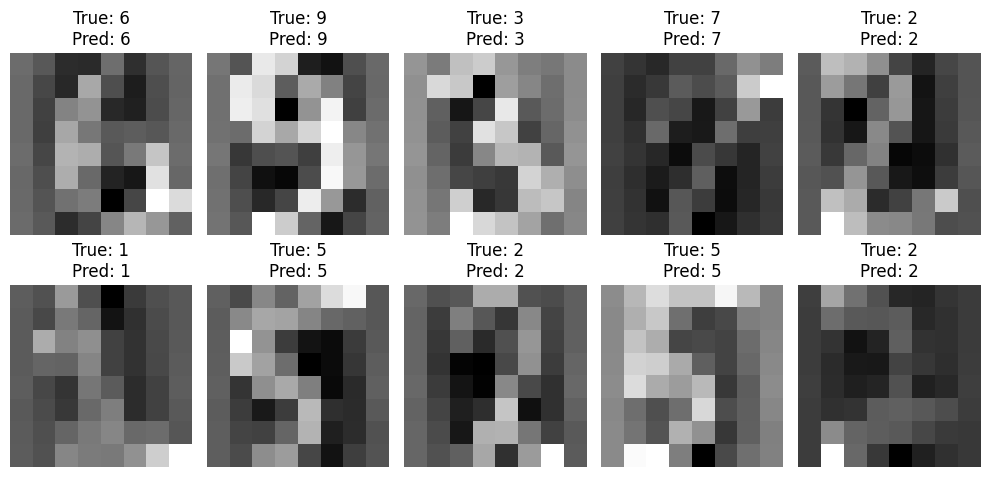

In [ ]:
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for ax, image, true_label, pred_label in zip(axes.ravel(), X_test, y_test, y_pred_rbf):
    ax.imshow(image.reshape(8, 8), cmap='gray')
    ax.set_title(f"True: {true_label}\nPred: {pred_label}")
    ax.axis('off')
plt.tight_layout()
plt.show()


### Using Grid Search for Hyperparameter Tuning


Hyperparameter tuning is the process of optimizing the parameters of a model to improve its performance.

 For Support Vector Machines (SVM), some critical hyperparameters include:

**C:** Controls the trade-off between maximizing the margin and minimizing the classification error. A smaller C makes a wider margin with more tolerance for misclassified points, while a larger C tries to classify more points correctly.

**gamma:** Controls how far the influence of a single training example reaches in RBF SVMs. A higher gamma makes the model focus on closely surrounding data points, which can lead to overfitting; a lower gamma makes the decision boundary smoother.

To perform hyperparameter tuning, we can use GridSearchCV from scikit-learn. This method performs an exhaustive search over a specified parameter grid, testing different combinations of values to find the best model configuration.



In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for linear and RBF kernels
param_grid = [
    {
        'kernel': ['linear'],
        'C': [0.1, 1, 10, 100]
    },
    {
        'kernel': ['rbf'],
        'C': [0.1, 1, 10, 100],
        'gamma': [0.001, 0.01, 0.1, 1]
    }
]


Step 1: Set Up Grid Search with Cross-Validation

**Define the model:** We’re tuning SVC with both linear and RBF kernels.

**Set up cross-validation:** We use GridSearchCV with 5-fold cross-validation to search over the parameter grid.

**Fit the model:** This will try each combination of hyperparameters and calculate cross-validated scores for each one.

In [ ]:
# Initialize the GridSearchCV object with SVM and the parameter grid
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

# Fit the grid search on the training data
grid_search.fit(X_train, y_train)

# Best parameters found by grid search
print("Best Parameters:", grid_search.best_params_)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}


In [ ]:
# Get the best model from grid search
best_svm_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred_best = best_svm_model.predict(X_test)

# Evaluate the tuned model
from sklearn.metrics import accuracy_score, classification_report

accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Tuned Model Accuracy: {accuracy_best * 100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))


Tuned Model Accuracy: 98.33%

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00        50
           2       0.96      1.00      0.98        47
           3       0.98      0.96      0.97        54
           4       1.00      1.00      1.00        60
           5       0.98      0.98      0.98        66
           6       0.98      1.00      0.99        53
           7       0.98      0.98      0.98        55
           8       0.98      0.95      0.96        43
           9       0.97      0.95      0.96        59

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540



# Support Vector Machines (SVM) - Comprehensive Study Guide
## For SPPU Practical Examination

# 1. Support Vector Machine - Core Concepts

## 1.1 Basic Definition
- SVM is a supervised learning algorithm used for classification and regression
- Goal: Find an optimal hyperplane that maximally separates different classes
- Works in both 2D and higher dimensional spaces

## 1.2 Key Terminology
1. Hyperplane:
   - In 2D: A line
   - In 3D: A plane
   - In n-D: A hyperplane
   - Formula: w^T * x + b = 0
     - w: weight vector
     - x: input vector
     - b: bias term

2. Support Vectors:
   - Data points closest to the hyperplane
   - Most important training points
   - Define the margin of the classifier

3. Margin:
   - Distance between the hyperplane and the nearest data points
   - Goal is to maximize this margin
   - Types:
     - Hard Margin: No points allowed inside margin
     - Soft Margin: Some points allowed inside (using C parameter)

## 1.3 Mathematical Foundation
1. Decision Function:
   ```
   f(x) = sign(w^T * x + b)
   - Returns +1 or -1 for binary classification
   ```

2. Optimization Problem:
   ```
   Minimize: (1/2)||w||²
   Subject to: yi(w^T * xi + b) ≥ 1 for all i
   ```

# 2. Linear SVM

## 2.1 Characteristics
- Creates linear decision boundary
- Suitable for linearly separable data
- Computationally efficient

## 2.2 Implementation
```python
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Data preprocessing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Linear SVM
linear_svm = SVC(kernel='linear', C=1.0)
linear_svm.fit(X_scaled, y)
```

## 2.3 Parameters
1. C (Regularization):
   - Controls trade-off between margin size and training error
   - Small C: Larger margin, may allow misclassifications
   - Large C: Smaller margin, tries to classify all points correctly

# 3. RBF (Radial Basis Function) Kernel SVM

## 3.1 Kernel Trick Concept
- Transforms data into higher dimensional space
- Makes non-linear data linearly separable
- Kernel function: K(x,y) = exp(-γ||x-y||²)

## 3.2 Implementation
```python
# RBF SVM
rbf_svm = SVC(kernel='rbf', C=1.0, gamma='scale')
rbf_svm.fit(X_scaled, y)
```

## 3.3 Important Parameters
1. gamma (γ):
   - Controls the reach of a single training example
   - Small gamma: Far reach (smoother boundary)
   - Large gamma: Close reach (more complex boundary)

2. C (Similar to linear SVM):
   - Controls regularization
   - Balances misclassification vs. simplicity

# 4. Practical Considerations

## 4.1 When to Use Which Kernel
1. Linear Kernel:
   - High-dimensional data
   - Text classification
   - When number of features > number of samples

2. RBF Kernel:
   - Non-linear data
   - Low to medium dimensional data
   - Complex decision boundaries needed

## 4.2 Data Preprocessing Steps
```python
# Complete preprocessing pipeline
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='rbf'))
])
```

## 4.3 Model Evaluation
```python
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report

# Cross-validation
scores = cross_val_score(svm, X_scaled, y, cv=5)

# Performance metrics
y_pred = svm.predict(X_test_scaled)
print(classification_report(y_test, y_pred))
```

# 5. Common Issues and Solutions

## 5.1 Overfitting
- Symptoms: High training accuracy, low test accuracy
- Solutions:
  - Decrease C
  - Use simpler kernel
  - Increase cross-validation

## 5.2 Underfitting
- Symptoms: Low training and test accuracy
- Solutions:
  - Increase C
  - Use more complex kernel
  - Feature engineering

## 5.3 Parameter Tuning
```python
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto', 0.1, 1],
    'kernel': ['linear', 'rbf']
}

grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_scaled, y)
```

# 6. Advantages and Disadvantages

## 6.1 Advantages
1. Effective in high-dimensional spaces
2. Memory efficient
3. Versatile through different kernel functions
4. Robust against overfitting

## 6.2 Disadvantages
1. Sensitive to feature scaling
2. Computationally intensive for large datasets
3. Parameter tuning can be complex
4. Not directly probabilistic